In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [3]:
# Data set taken from https://www.kaggle.com/datasets/robikscube/rollercoaster-database
# Import Data Set
df = pd.read_csv('C:\\Users\\seven\\Downloads\\coaster_db.csv')

In [4]:
# See how many rows and columns are in data set
df.shape

(1087, 56)

In [8]:
# Cursory look at how the data is laid out
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [9]:
# View list of columns
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [11]:
# Check what type of columns they are
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [12]:
# Get information on the numeric data
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [22]:
# Data Cleaning
# Added complete column set, then commented out uneeded columns and reran, then reassigned dataframe
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
    #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #'Track layout', 'Fastrack available', 'Soft opening date.1',
    #'Closing date', 
    #'Opened', 
    #'Replaced by', 'Website',
    #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #'Single rider line available', 'Restraint Style',
    #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    'year_introduced', 'latitude', 'longitude', 'Type_Main',
    'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
    'Inversions_clean', 'Gforce_clean']].copy()
# Also could have used df.drop(['selected_columns'], axis = 1), etc to get same result

In [23]:
# Verify data frame has been reduced
df.shape
# It is (1087,13)

(1087, 13)

In [24]:
# Re-review column types
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [26]:
# Change opening_date_clean from object to datetime64 column
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [61]:
# Rename Columns and rewrite data frame
df = df.rename(columns ={'coaster_name':'Coaster Name',
                   'year_introduced':'Year Introduced',
                   'opening_date_clean':'Opening Date',
                   'speed_mph':'Speed (mph)',
                   'height_ft':'Height (feet)',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'GForce'})

In [62]:
#verify Changes
df.head()

,Coaster Name,Location,Status,Manufacturer,Year Introduced,latitude,longitude,Type_Main,Opening Date,Speed (mph),Height (feet),Inversions,GForce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [63]:
# Check for Null Values (NaN)
df.isna().sum()
# Will clean if Null Values affect data visualizations

Coaster Name         0
Location             0
Status             213
Manufacturer        59
Year Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening Date       250
Speed (mph)        150
Height (feet)      916
Inversions           0
GForce             725
dtype: int64

In [64]:
# Check for Duplicates
df.duplicated()
# Looks good, but running .loc to be sure

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [65]:
# Confirmed no duplicates
df.loc[df.duplicated()]

,Coaster Name,Location,Status,Manufacturer,Year Introduced,latitude,longitude,Type_Main,Opening Date,Speed (mph),Height (feet),Inversions,GForce


In [66]:
# Check for repeats
df.loc[df.duplicated(subset=['Coaster Name'])].head(5)

,Coaster Name,Location,Status,Manufacturer,Year Introduced,latitude,longitude,Type_Main,Opening Date,Speed (mph),Height (feet),Inversions,GForce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [74]:
# Checking first row returend for what the duplicate looks like
df.query('Location == "Crystal Beach Park"')
# Different Year Introduced entries

,Coaster Name,Location,Status,Manufacturer,Year Introduced,latitude,longitude,Type_Main,Opening Date,Speed (mph),Height (feet),Inversions,GForce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [75]:
# Referencing Columns again
df.columns

Index(['Coaster Name', 'Location', 'Status', 'Manufacturer', 'Year Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening Date', 'Speed (mph)',
       'Height (feet)', 'Inversions', 'GForce'],
      dtype='object')

In [81]:
# Looking up rows that are NOT duplicates (97 duplicate rows, 990 unique rows (1087 total rows))
# Save as data frame
# df.loc[df.duplicated(subset=['Coaster Name','Location','Opening Date'])]
df = df.loc[~df.duplicated(subset=['Coaster Name','Location','Opening Date'])]

In [84]:
# Duplicate rows deleted and data frame saved
df = df.loc[~df.duplicated(subset=['Coaster Name','Location','Opening Date'])] \
    .reset_index(drop=True).copy()

In [85]:
# Verifying
df.shape

(990, 13)

In [86]:
# Building Data Visuals
df['Year Introduced'].value_counts()

Year Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

In [87]:
# I don't need every year, just the top 10 years where the most roller coasters were debuted.
df['Year Introduced'].value_counts() \
    .head(10)

Year Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2011    24
2007    24
2013    23
Name: count, dtype: int64

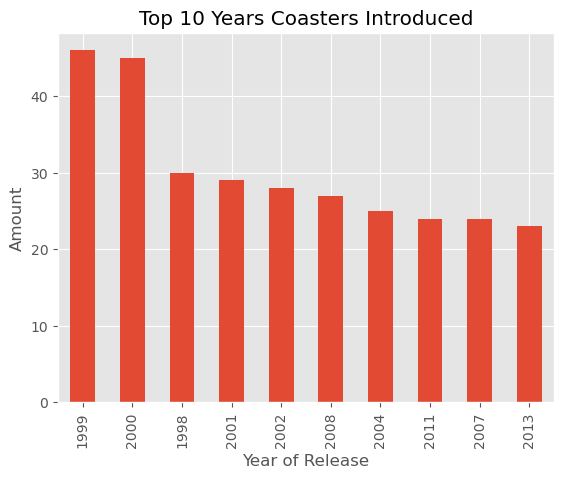

In [105]:
# Make a Bar Chart of Top 10 Years Roller Coasters were Introduced
ax = df['Year Introduced'].value_counts() \
    .head(10) \
    .plot(kind ='bar', title = 'Top 10 Years Coasters Introduced')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Amount')
plt.show()

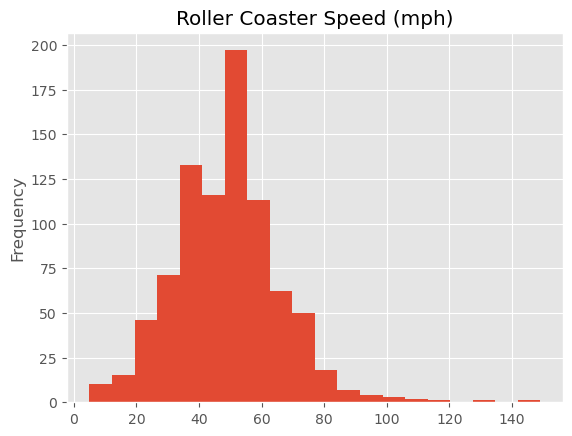

In [104]:
# Make a Histogram showing Speed metrics
df['Speed (mph)'].plot(kind = 'hist',
                        bins = 20,
                        title = 'Roller Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')
plt.show()

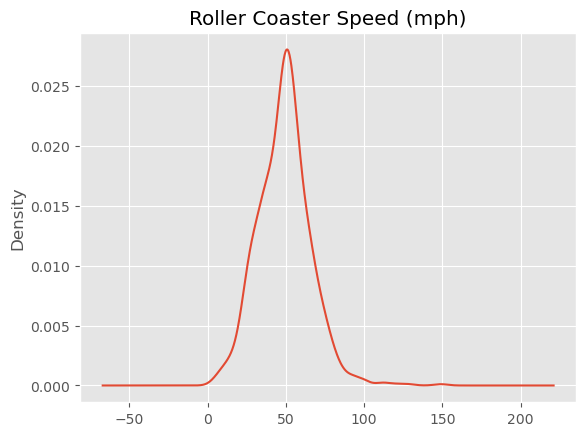

In [103]:
# Make a Density Plot showing same metrics as above
df['Speed (mph)'].plot(kind = 'kde',
                       title = 'Roller Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')
plt.show()

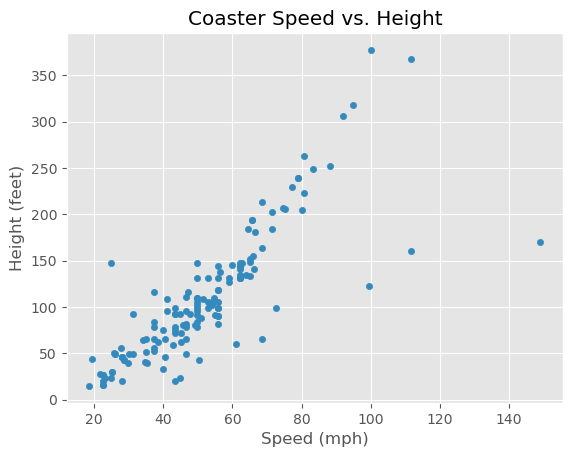

In [102]:
# Make a Scatter Plot showing relation to Height and Speed of Roller Coaster
df.plot(kind = 'scatter',
        x = 'Speed (mph)',
        y = 'Height (feet)',
        title = 'Coaster Speed vs. Height')
plt.show()

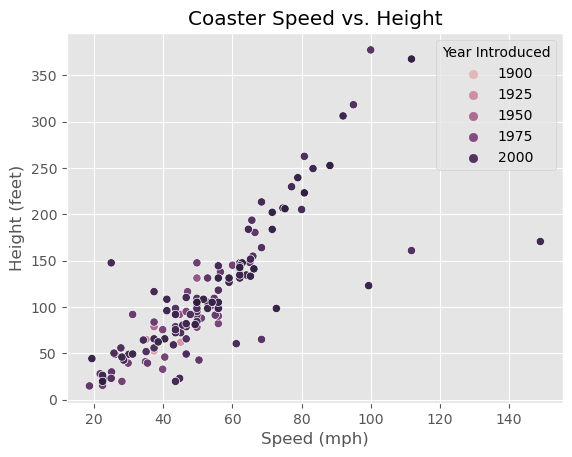

In [112]:
# Make a Scatterplot with a Legend
ax = sns.scatterplot(x = 'Speed (mph)',
                     y = 'Height (feet)',
                     hue = 'Year Introduced',
                     data = df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

C:\Users\seven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

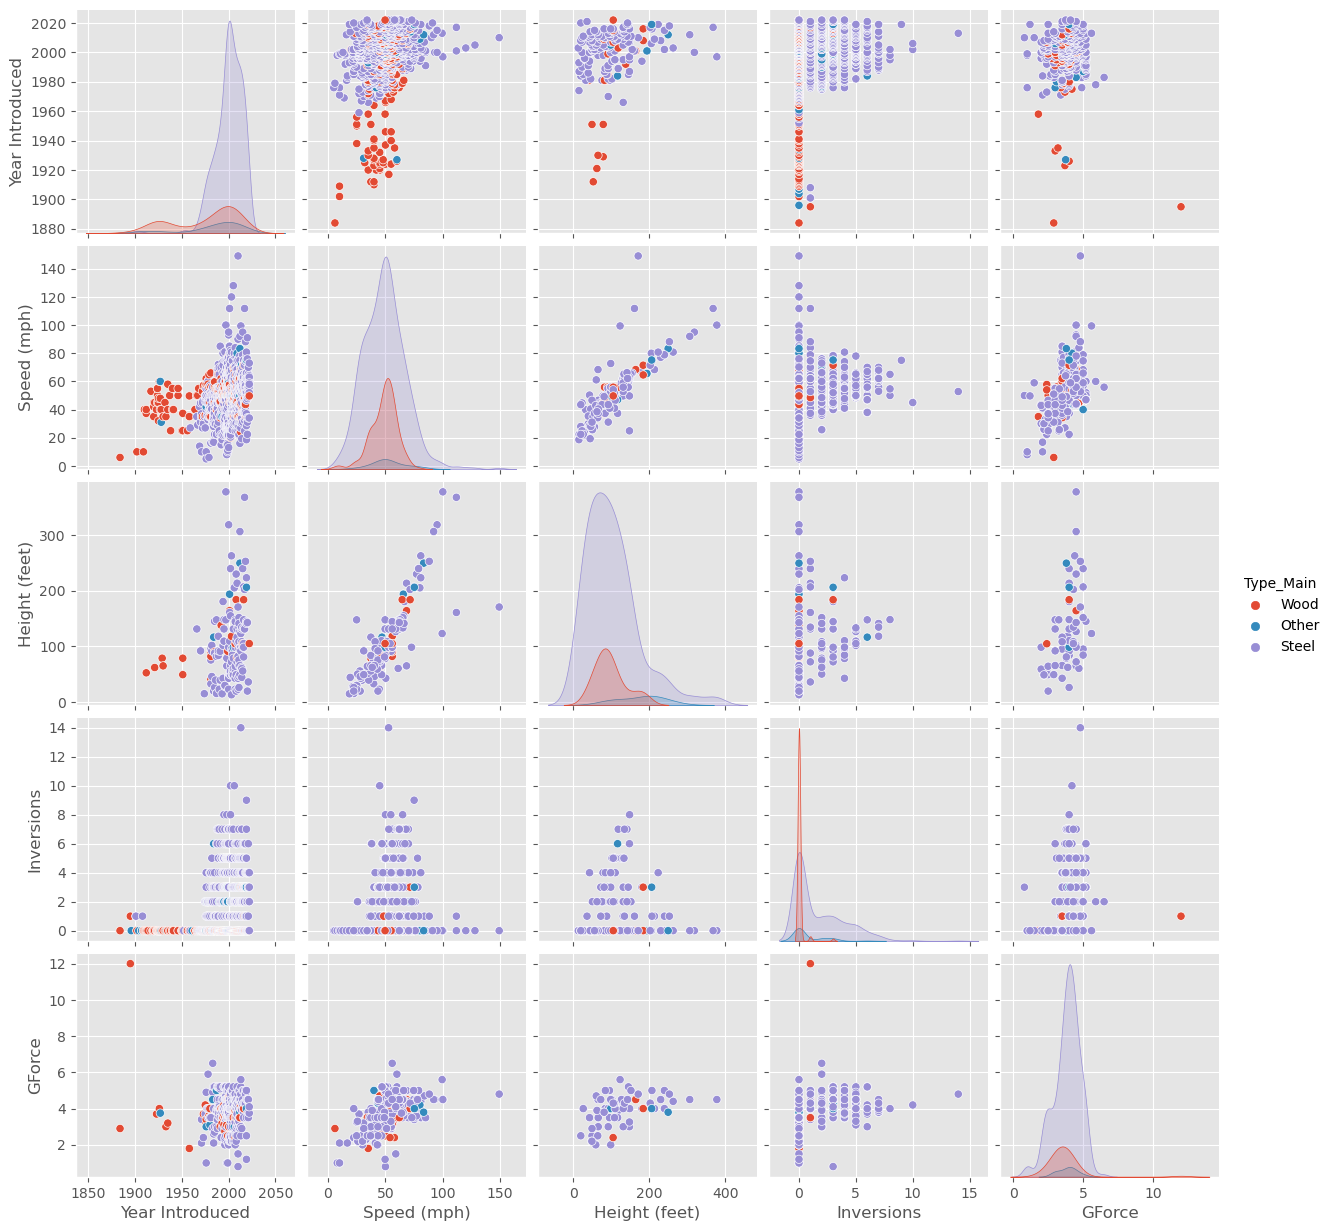

In [113]:
# Make a Pairplot
sns.pairplot(df,
             vars = ['Year Introduced', 'Speed (mph)', 'Height (feet)', 'Inversions', 'GForce'],
             hue = 'Type_Main')
plt.show()
# Threw future warning due to Nulls being in data frame

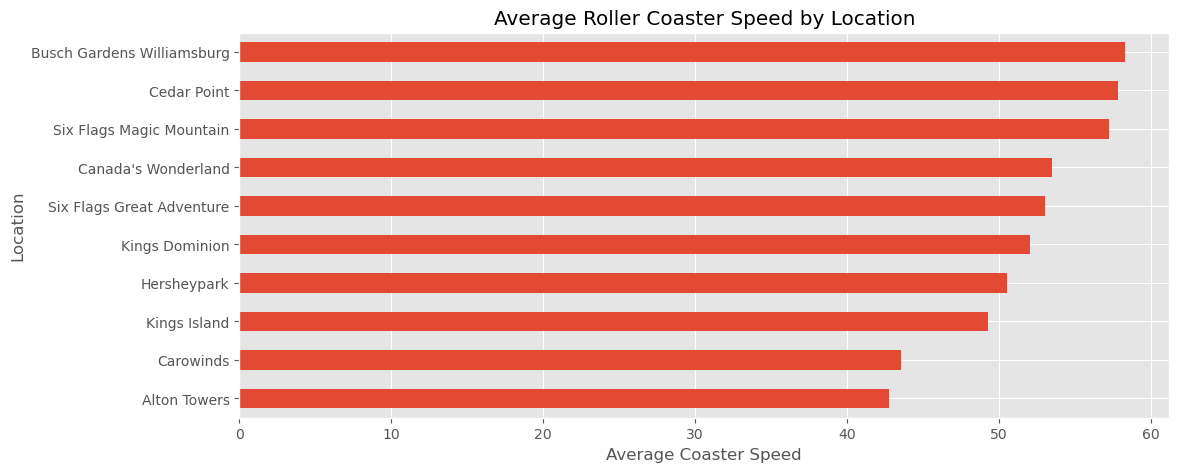

In [114]:
# Finally, where are the locations with the fastest Roller Coasters (minimum of 10)?
ax = df.query('Location != "Other"') \
     .groupby('Location')['Speed (mph)'] \
     .agg(['mean','count']) \
     .query('count >= 10') \
     .sort_values('mean')['mean'] \
     .plot(kind = 'barh', figsize = (12,5), title = 'Average Roller Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()